In [467]:
from importlib import reload 
import MktData
reload(MktData)
import json
import pandas as pd
import numpy as np

## MktData module for getting historical EOD, intraday, and fundamental data

#### Can view the available exchanges in database

In [99]:
Exchanges = MktData.get_exchanges()
Exchanges.head()

,Name,OperatingMIC,Country,Currency
Code,,,,
US,USA Stocks,"XNAS, XNYS",USA,USD
LSE,London Exchange,XLON,UK,GBP
TO,Toronto Exchange,XTSE,Canada,CAD
V,TSX Venture Exchange,XTSX,Canada,CAD
BE,Berlin Exchange,XBER,Germany,EUR


#### Then select an exchange and can view the symbols listed on that exchange and some summary information. Can then narrow down and focus on a single stock

In [100]:
exchange = "LSE"
exc_symbols = MktData.get_exchange_data(exchange)
exc_symbols.head()

,Name,Country,Exchange,Currency,Type
Code,,,,,
0A1O,"Zoom Video Communications, Inc",UK,LSE,USD,Common Stock
0CXC,Stora Enso Oyj,UK,LSE,GBP,Common Stock
0DHJ,Autogrill S.p.A,UK,LSE,GBP,Common Stock
0DNH,Atos SE,UK,LSE,GBP,Common Stock
0DQ7,Beiersdorf Aktiengesellschaft,UK,LSE,GBP,Common Stock


#### Can search for a specified symbol, a stock or index say to find out what exchange it is listed on etc to be able to properly direct a more detailed api call

In [157]:
MktData.search_symbol("AEX").head()

,Exchange,Name,Type,Country,Currency,ISIN,previousClose,previousCloseDate
Code,,,,,,,,
AEX,INDX,AEX Amsterdam Index,INDEX,Netherlands,EUR,None,541.910,2020-09-08
AEX,LSE,Aminex PLC,Common Stock,UK,GBX,IE0003073255,0.675,2020-09-07
AEX,STU,Chubb Limited,Common Stock,Germany,EUR,None,130.000,2020-09-04
AEX,F,Chubb Limited,Common Stock,Germany,EUR,None,132.000,2020-09-04
IAEX,LSE,iShares AEX UCITS ETF EUR (Dist),ETF,UK,GBX,IE00B0M62Y33,5402.000,2020-09-04


#### We can now see that AEX Index is on the "INDX" exchange on the api so we specify our calls to the right exchange. Can select a given historical date to examine the index. Will return the components of the index on that date if available.

In [239]:
aex_index = MktData.Index("AEX", asof_date = '2020-01-01')

#### We create an index object and can then see what stocks are contained in this index. We can do this same following analysis on an entire exchange as opposed to a single index by using the MktData.Exchange class

In [240]:
aex_index.Tickers_Detailed().head()

No historical ticker data. Returning current ticker data


,Code,Exchange,Name,Sector,Industry
ticker,,,,,
KPN.AS,KPN,AS,Koninklijke KPN N.V,Communication Services,Telecom Services
MT.AS,MT,AS,ArcelorMittal,Basic Materials,Steel
WKL.AS,WKL,AS,Wolters Kluwer N.V,Communication Services,Publishing
PHIA.AS,PHIA,AS,Koninklijke Philips N.V,Healthcare,Diagnostics & Research
RAND.AS,RAND,AS,Randstad N.V,Industrials,Staffing & Employment Services


#### We can see the tickers are listed on the "AS" exchange so we specify the country code of the exchange for getting the data of the individual underlying stocks. We then call Factors_df to calculate a dataframe containing a wide range of fundamental data, momentum, volatility and price data for each underlying through time and returning it as a panel dataset. 

In [106]:
aex_index.country = "AS"
_ = aex_index.Factors_df()

No historical ticker data. Returning current ticker data
KPN successful.
MT successful.
WKL failed.
No outstanding Shares data available
PHIA successful.


/Users/tadhgokeeffe/env/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


RAND successful.
ASM successful.
AKZA successful.
REN failed.
No outstanding Shares data available
HEIA successful.
DSM successful.
AGN successful.
ASML successful.
RDSA successful.
UNA failed.
No outstanding Shares data available
INGA successful.
AD successful.
ABN successful.
ASRNL failed.
No outstanding Shares data available
GLPG successful.
IMCD failed.
No outstanding Shares data available
NN successful.
TKWY failed.
No outstanding Shares data available
ADYEN failed.
No outstanding Shares data available
URW failed.
No outstanding Shares data available
PRX successful.


We can now use this panel dataset for modelling/analysis etc. 

In [111]:
aex_index.Factor_df.tail()

,Assets to Equity,EBIT to Equity,Liability to Assets,Liability to Equity,Short Term Debt to Cash,Earnings per Share,Assets Yield,Investments Yield,Profit Margin,Book Price,...,1y ma,1m ma,1y1m momentum,CountryName,Sector,Industry,GicSector,GicIndustry,GicSubIndustry,Ticker
2020-09-07,7.111030,0.014479,0.858397,6.104089,0.182112,0.977500,0.001254,0.945402,0.316354,33.892584,...,28.006873,31.863333,0.129006,Netherlands,Financial Services,Insurance—Diversified,Financials,Insurance,Life & Health Insurance,NN
2020-09-07,2.036956,0.053304,0.502259,1.023080,0.071611,0.633936,0.006812,-0.076865,-1.699419,212.797404,...,113.417152,132.616667,0.156390,Netherlands,Basic Materials,Specialty Chemicals,None,None,None,DSM
2020-09-07,17.294978,0.018502,0.942128,16.294081,0.003910,0.092151,0.001057,-8.375000,0.095583,25.284592,...,3.083329,2.420987,-0.241835,Netherlands,Financial Services,Insurance—Diversified,None,None,None,AGN
2020-09-07,2.509405,0.027940,0.600444,1.506757,0.257629,0.225122,0.007568,13.866667,0.416610,178.081264,...,40.464407,42.352167,0.045597,Netherlands,Healthcare,Diagnostics & Research,None,None,None,PHIA
2020-09-07,1.209693,0.040692,0.166136,0.200974,0.430757,0.592700,0.031062,4.126923,0.375676,136.089086,...,70.627713,82.001333,0.149313,Netherlands,Communication Services,Internet Content & Information,None,None,None,PRX


In [241]:
aex_index.History()
aex_index.ticker_history.tail()

,Open,High,Low,Close,Adjusted_close,Volume
Date,,,,,,
2020-09-02,555.34,565.57,554.71,561.27,561.27,83608896
2020-09-03,565.45,568.08,546.80,549.60,549.60,98206000
2020-09-04,545.49,552.34,535.21,540.27,540.27,107816600
2020-09-07,541.17,547.86,541.15,547.14,547.14,59132800
2020-09-08,547.18,548.48,539.90,540.43,540.43,23532932


In [242]:
aex_index.IntradayHistory()
aex_index.intraday_history.tail()

,Gmtoffset,Datetime,Open,High,Low,Close,Volume
Timestamp,,,,,,,
1599491100,0,2020-09-07 15:05:00,546.87,546.87,546.55,546.71,0.0
1599491400,0,2020-09-07 15:10:00,546.59,547.26,546.59,547.26,0.0
1599491700,0,2020-09-07 15:15:00,547.37,547.68,547.28,547.68,0.0
1599492000,0,2020-09-07 15:20:00,547.65,547.86,547.60,547.80,0.0
1599492300,0,2020-09-07 15:25:00,547.77,547.77,546.58,546.58,0.0


#### We can generate custom portfolios. Lets say we want to look at Tech companies in the S&P 500

In [234]:
us_tech = MktData.Index("GSPC", asof_date = '2020-01-01')
__ = us_tech.Tickers()

In [235]:
us_tech.get_ticker_info().head()

,Code,Exchange,Name,Sector,Industry
ticker,,,,,
AIZ.US,AIZ,US,"Assurant, Inc",Financial Services,Insurance—Specialty
MNST.US,MNST,US,Monster Beverage Corporation,Consumer Defensive,Beverages—Non-Alcoholic
GPS.US,GPS,US,"The Gap, Inc",Consumer Cyclical,Apparel Retail
UNM.US,UNM,US,Unum Group,Financial Services,Insurance—Life
PGR.US,PGR,US,The Progressive Corporation,Financial Services,Insurance—Property & Casualty


#### Filter for Tech companies

In [190]:
tech_comps = us_tech.ticker_info.loc[us_tech.ticker_info.Sector == 'Technology']

#### We initialise an empty portfolio and then add each company to the portfolio

In [485]:
custom_index = MktData.Portfolio()

In [486]:
_ = tech_comps.apply(lambda x: custom_index.Add_Asset(x.Code, x.Exchange,quantity=np.random.randint(10)),1)

#### We can then generate the historical panel dataset for analysis

In [487]:
custom_index.Factors_df()

FISV successful.
ANSS successful.
INTC successful.
QCOM successful.
ACN successful.
AVGO successful.
SNPS successful.
TDY successful.
NTAP successful.
IT successful.
CTSH successful.
TXN successful.
TEL successful.
CTXS successful.
XLNX successful.
SWKS successful.
AMAT successful.
INTU successful.
GLW successful.
ZBRA successful.
FFIV successful.
CSCO successful.
MXIM successful.
MSI successful.
CDNS successful.
KLAC successful.
APH successful.
ORCL successful.
FIS successful.
CDW successful.
AAPL successful.
FLIR successful.
IPGP successful.
CRM successful.
NVDA successful.
PAYC successful.
ADSK successful.
ADBE successful.
MSFT successful.
WDC successful.
AKAM successful.
JNPR successful.
IBM successful.
GRMN successful.
LRCX successful.
ADI successful.
LDOS successful.
FTNT successful.
MU successful.
VRSN successful.
XRX successful.
JKHY successful.
FLT successful.
AMD successful.
HPQ successful.
STX successful.
NOW successful.
BR successful.
MCHP successful.
TYL successful.
ANET s

,Assets to Equity,EBIT to Equity,Liability to Assets,Liability to Equity,Short Term Debt to Cash,Earnings per Share,Assets Yield,Investments Yield,Profit Margin,Book Price,...,1y ma,1m ma,1y1m momentum,CountryName,Sector,Industry,GicSector,GicIndustry,GicSubIndustry,Ticker
2000-03-06,1.483850,0.000000,0.326077,0.483850,NaN,NaN,0.046345,NaN,0.000000,NaN,...,NaN,NaN,NaN,USA,Technology,Semiconductor Equipment & Materials,Information Technology,Semiconductors & Semiconductor Equipment,Semiconductor Equipment,AMAT
2000-03-06,1.552629,NaN,0.355861,0.552521,NaN,NaN,0.017899,NaN,NaN,NaN,...,NaN,NaN,NaN,USA,Technology,Software—Application,Information Technology,Software,Application Software,INTU
2000-03-06,1.186976,NaN,0.157523,0.186976,NaN,NaN,0.040084,NaN,NaN,NaN,...,NaN,NaN,NaN,USA,Technology,Computer Hardware,Information Technology,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",NTAP
2000-03-06,1.343043,0.000000,0.255422,0.343043,NaN,NaN,0.038293,NaN,0.000000,NaN,...,NaN,NaN,NaN,USA,Technology,Software—Infrastructure,Information Technology,Software,Application Software,SNPS
2000-03-06,1.506438,NaN,0.336182,0.506438,NaN,NaN,0.027741,NaN,NaN,NaN,...,NaN,NaN,NaN,USA,Technology,Software—Application,Information Technology,Software,Application Software,ADSK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-08,2.501398,0.102031,0.600224,1.501398,0.254467,0.621259,0.027790,5.282565,0.632220,65.705334,...,44.417232,42.508000,-0.043935,USA,Technology,Communication Equipment,Information Technology,Communications Equipment,Communications Equipment,CSCO
2020-09-08,1.833959,0.052677,0.454732,0.833959,0.412124,0.977534,0.016790,-10.826790,0.667917,120.139082,...,110.905106,117.603207,0.058641,USA,Technology,Semiconductors,Information Technology,Semiconductors & Semiconductor Equipment,Semiconductors,ADI
2020-09-08,-17.242699,-0.491440,1.057996,-18.242699,0.058987,0.509722,0.021434,-1.332123,0.167413,37.726431,...,18.074402,18.807000,0.039732,USA,Technology,Computer Hardware,Information Technology,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",HPQ
2020-09-08,3.605014,0.060291,0.721733,2.601857,0.676551,0.006971,0.000155,-0.008571,0.303257,1375.632222,...,12.252272,9.627667,-0.241070,USA,Technology,Communication Equipment,Information Technology,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",HPE


In [488]:
custom_index.Factor_df.tail()

,Assets to Equity,EBIT to Equity,Liability to Assets,Liability to Equity,Short Term Debt to Cash,Earnings per Share,Assets Yield,Investments Yield,Profit Margin,Book Price,...,1y ma,1m ma,1y1m momentum,CountryName,Sector,Industry,GicSector,GicIndustry,GicSubIndustry,Ticker
2020-09-08,2.501398,0.102031,0.600224,1.501398,0.254467,0.621259,0.027790,5.282565,0.632220,65.705334,...,44.417232,42.508000,-0.043935,USA,Technology,Communication Equipment,Information Technology,Communications Equipment,Communications Equipment,CSCO
2020-09-08,1.833959,0.052677,0.454732,0.833959,0.412124,0.977534,0.016790,-10.826790,0.667917,120.139082,...,110.905106,117.603207,0.058641,USA,Technology,Semiconductors,Information Technology,Semiconductors & Semiconductor Equipment,Semiconductors,ADI
2020-09-08,-17.242699,-0.491440,1.057996,-18.242699,0.058987,0.509722,0.021434,-1.332123,0.167413,37.726431,...,18.074402,18.807000,0.039732,USA,Technology,Computer Hardware,Information Technology,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",HPQ
2020-09-08,3.605014,0.060291,0.721733,2.601857,0.676551,0.006971,0.000155,-0.008571,0.303257,1375.632222,...,12.252272,9.627667,-0.241070,USA,Technology,Communication Equipment,Information Technology,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",HPE
2020-09-08,2.140815,0.106345,0.532888,1.140815,0.207699,1.685606,0.040710,31.785714,0.822687,197.620315,...,276.099108,326.427000,0.167446,USA,Technology,Software—Application,Information Technology,Software,Application Software,INTU


#### Plot of individual price series of custom index constituents

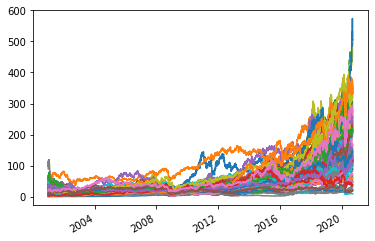

In [489]:
a = custom_index.Factor_df.groupby("Ticker").Adjusted_close.plot()

#### Can view historical performance of custom portfolio through time

In [490]:
custom_index.NAV_history()
rets = np.log(custom_index.nav_history/custom_index.nav_history.shift(1))
print("Sharpe Ratio: "+str(MktData.sharpe_ratio(rets)))

Sharpe Ratio: 0.023761091884431162


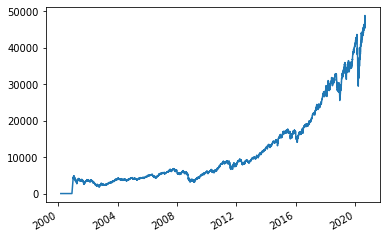

In [491]:
a = custom_index.nav_history.plot()

#### Info on one specific stock

In [226]:
aapl = MktData.Stock("AAPL","US")

In [227]:
aapl.General_Info()

{'Code': 'AAPL',
 'Type': 'Common Stock',
 'Name': 'Apple Inc',
 'Exchange': 'NASDAQ',
 'CurrencyCode': 'USD',
 'CurrencyName': 'US Dollar',
 'CurrencySymbol': '$',
 'CountryName': 'USA',
 'CountryISO': 'US',
 'ISIN': 'US0378331005',
 'CUSIP': '037833100',
 'CIK': '0000320193',
 'EmployerIdNumber': '94-2404110',
 'FiscalYearEnd': 'September',
 'IPODate': '1980-12-12',
 'InternationalDomestic': 'International/Domestic',
 'Sector': 'Technology',
 'Industry': 'Consumer Electronics',
 'GicSector': 'Information Technology',
 'GicGroup': 'Technology Hardware & Equipment',
 'GicIndustry': 'Technology Hardware, Storage & Peripherals',
 'GicSubIndustry': 'Technology Hardware, Storage & Peripherals',
 'HomeCategory': 'Domestic',
 'IsDelisted': False,
 'Description': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of p

In [228]:
aapl.Industry_Info()

{'CountryName': 'USA',
 'Sector': 'Technology',
 'Industry': 'Consumer Electronics',
 'GicSector': 'Information Technology',
 'GicIndustry': 'Technology Hardware, Storage & Peripherals',
 'GicSubIndustry': 'Technology Hardware, Storage & Peripherals'}

In [229]:
aapl.Shares_History().head()

,shares
date,
2020-06-30,4355000000
2020-03-31,4405000000
2019-12-31,4455000000
2019-09-30,4649000000
2019-06-30,4601000000


In [230]:
aapl.Market_Cap_History().tail()

,shares,Adjusted_close,marketCap
date,,,
2020-08-31,4.355000e+09,129.04,5.619692e+11
2020-09-01,4.355000e+09,134.18,5.843539e+11
2020-09-02,4.355000e+09,131.40,5.722470e+11
2020-09-03,4.355000e+09,120.88,5.264324e+11
2020-09-04,4.355000e+09,120.96,5.267808e+11


In [231]:
aapl.Full_Financial_History()
aapl.FullFinancials.tail()

,currency_symbol,totalAssets,intangibleAssets,earningAssets,otherCurrentAssets,totalLiab,totalStockholderEquity,deferredLongTermLiab,otherCurrentLiab,commonStock,...,incomeTaxExpense,totalRevenue,totalOperatingExpenses,costOfRevenue,totalOtherIncomeExpenseNet,discontinuedOperations,netIncomeFromContinuingOps,netIncomeApplicableToCommonShares,preferredStockAndOtherAdjustments,AsOf
filing_date,,,,,,,,,,,,,,,,,,,,,
2020-01-29,USD,3.406180e+11,NaN,NaN,1.202600e+10,2.510870e+11,8.953100e+10,NaN,4.183600e+10,4.597200e+10,...,3.682000e+09,9.181900e+10,9.648000e+09,5.660200e+10,89000000.0,NaN,2.223600e+10,2.223600e+10,NaN,2019Q4
2020-03-06,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.803200e+10,...,1.886000e+09,5.831300e+10,4.546000e+10,3.594300e+10,-10000000.0,NaN,1.124900e+10,1.124900e+10,NaN,2020Q1
2020-05-01,USD,3.204000e+11,NaN,NaN,1.569100e+10,2.419750e+11,7.842500e+10,NaN,4.325200e+10,4.803200e+10,...,1.886000e+09,5.831300e+10,9.517000e+09,3.594300e+10,-10000000.0,NaN,1.124900e+10,1.124900e+10,NaN,2020Q1
2020-06-04,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.869600e+10,...,1.884000e+09,5.968500e+10,4.659400e+10,3.700500e+10,-158000000.0,NaN,1.125300e+10,1.125300e+10,NaN,2020Q2
2020-07-31,USD,3.173440e+11,NaN,NaN,1.098700e+10,2.450620e+11,7.228200e+10,NaN,4.131800e+10,4.869600e+10,...,1.884000e+09,5.968500e+10,9.589000e+09,3.700500e+10,-158000000.0,NaN,1.125300e+10,1.125300e+10,NaN,2020Q2


In [232]:
aapl.History()
aapl.ticker_history.tail()

,Open,High,Low,Close,Adjusted_close,Volume
Date,,,,,,
2020-08-31,127.58,131.00,126.00,129.04,129.04,225702700
2020-09-01,132.76,134.80,130.53,134.18,134.18,152470100
2020-09-02,137.59,137.98,127.00,131.40,131.40,200119000
2020-09-03,126.91,128.84,120.50,120.88,120.88,257599600
2020-09-04,120.07,123.70,110.89,120.96,120.96,332607200


In [233]:
aapl.IntradayHistory()

,Gmtoffset,Datetime,Open,High,Low,Close,Volume
Timestamp,,,,,,,
1596634200,0,2020-08-05 13:30:00,109.20,109.29,108.93,108.94,2219198.0
1596634500,0,2020-08-05 13:35:00,108.93,109.69,108.90,109.41,1010643.0
1596634800,0,2020-08-05 13:40:00,109.42,109.68,109.24,109.44,704501.0
1596635100,0,2020-08-05 13:45:00,109.44,109.99,109.31,109.98,798232.0
1596635400,0,2020-08-05 13:50:00,109.99,110.39,109.90,110.31,1003138.0
...,...,...,...,...,...,...,...
1599248100,0,2020-09-04 19:35:00,122.20,122.34,121.06,121.56,3129390.0
1599248400,0,2020-09-04 19:40:00,121.56,121.90,121.10,121.17,2880209.0
1599248700,0,2020-09-04 19:45:00,121.18,121.77,120.43,121.06,3426545.0


#### Other asset types

In [496]:
Exchanges.loc["CC"]

Name            Cryptocurrencies
OperatingMIC                CRYP
Country                  Unknown
Currency                 Uknkown
Name: CC, dtype: object

In [498]:
cryptos = MktData.get_exchange_data("CC")
cryptos.head()

,Name,Country,Exchange,Currency,Type
Code,,,,,
0xBTC-USD,0xBitcoin,Unknown,CC,USD,Currency
1337-USD,Elite,Unknown,CC,USD,Currency
1MT-USD,1Million Token,Unknown,CC,USD,Currency
1ST-USD,FirstBlood,Unknown,CC,USD,Currency
1UP-USD,Uptrennd,Unknown,CC,USD,Currency


In [499]:
Exchanges.loc["COMM"]

Name            Commodities
OperatingMIC           None
Country             Unknown
Currency            Uknkown
Name: COMM, dtype: object

In [500]:
commods = MktData.get_exchange_data("COMM")
commods.head()

,Name,Country,Exchange,Currency,Type
Code,,,,,
BO,Soybean Oil,USA,COMM,USD,Commodity
BZ,Brent Crude,USA,COMM,USD,Commodity
C,Corn,USA,COMM,USD,Commodity
CACF,CAC 40 Futures,Unknown,COMM,EUR,Futures
CC,Cocoa,USA,COMM,USD,Commodity


In [501]:
Exchanges.loc["GBOND"]

Name            Government Bonds
OperatingMIC                None
Country                  Unknown
Currency                 Uknkown
Name: GBOND, dtype: object

In [502]:
govies = MktData.get_exchange_data("GBOND")
govies.head()

,Name,Country,Exchange,Currency,Type
Code,,,,,
AU10Y,Australia Government Bond 10Y,Australia,GBOND,AUD,BOND
BR10Y,Brazil Government Bond 10Y,Brazil,GBOND,BRL,BOND
CA10Y,Canada Government Bond 10Y,Canada,GBOND,CAD,BOND
CGBU0,10 Year Government of Canada Bond Future Sept 20,USA,GBOND,USD,Common Stock
DE10Y,Germany Government Bond 10Y,Germany,GBOND,EUR,BOND


In [503]:
Exchanges.loc["BOND"]

Name            Bond Virtual Exchange
OperatingMIC                     None
Country                           USA
Currency                          USD
Name: BOND, dtype: object

In [504]:
corps = MktData.get_exchange_data("BOND")
corps.head()

,Name,Country,Exchange,Currency,Type
Code,,,,,
CH0107559392,"Province of Quebec, 2.875% 17dec2021",Unknown,BOND,Uknkown,BOND
CH0195288102,"Engie, 1.125% 9oct2020, CHF",Unknown,BOND,Uknkown,BOND
CH0195288193,"Engie, 1.625% 9oct2024, CHF",Unknown,BOND,Uknkown,BOND
CH0248531110,"VTB, 5% 24oct2024, CHF (4)",Unknown,BOND,Uknkown,BOND
CH0310140584,"African Bank, 5.5% 5jun2021, CHF",Unknown,BOND,Uknkown,BOND


In [507]:
Exchanges.loc["FOREX"]

Name              FOREX
OperatingMIC       CDSL
Country         Unknown
Currency        Uknkown
Name: FOREX, dtype: object

In [506]:
forex = MktData.get_exchange_data("FOREX")
forex.head()

,Name,Country,Exchange,Currency,Type
Code,,,,,
AEDAUD,AEDAUD,Unknown,FOREX,NaN,Currency
AEDCAD,AEDCAD,Unknown,FOREX,NaN,Currency
AEDCHF,AEDCHF,Unknown,FOREX,NaN,Currency
AEDEUR,AEDEUR,Unknown,FOREX,NaN,Currency
AEDGBP,AEDGBP,Unknown,FOREX,NaN,Currency


In [510]:
Exchanges.loc["MONEY"]

Name            Money Market Virtual Exchange
OperatingMIC                             None
Country                               Unknown
Currency                              Uknkown
Name: MONEY, dtype: object

In [509]:
MM= MktData.get_exchange_data("MONEY")
MM.head()

,Name,Country,Exchange,Currency,Type
Code,,,,,
ECBEURAUD,ECBEURAUD,Unknown,MONEY,EUR,MONEY
ECBEURBGN,ECBEURBGN,Unknown,MONEY,EUR,MONEY
ECBEURBRL,ECBEURBRL,Unknown,MONEY,EUR,MONEY
ECBEURCAD,ECBEURCAD,Unknown,MONEY,EUR,MONEY
ECBEURCHF,ECBEURCHF,Unknown,MONEY,EUR,MONEY
